In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, f1_score,  recall_score,
                             roc_auc_score, balanced_accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df_train=pd.read_csv('C:/Users/chris/Desktop/Personal/titanic/train.csv')

In [3]:
df_test=pd.read_csv('C:/Users/chris/Desktop/Personal/titanic/test.csv')

In [4]:
df_gender=pd.read_csv('C:/Users/chris/Desktop/Personal/titanic/gender_submission.csv')

In [5]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df=df_train

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
df['Age'].mean(skipna=True)

29.69911764705882

In [13]:
df['Age'].max()

80.0

In [14]:
df['Age'].min()

0.42

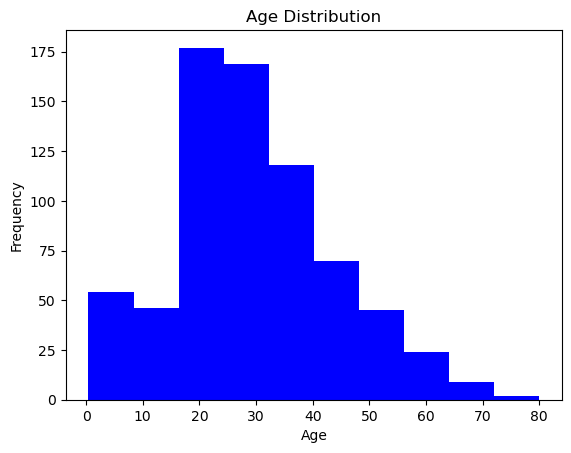

In [15]:
plt.hist(df['Age'], color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
df_mean=df.copy()

In [17]:
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)

In [18]:
df_mean['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [19]:
df_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df_mean.corr()

C:\Users\chris\AppData\Local\Temp\ipykernel_35892\2937057679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


C:\Users\chris\AppData\Local\Temp\ipykernel_35892\2007163744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mean.corr(), cmap="YlGnBu", annot=True)


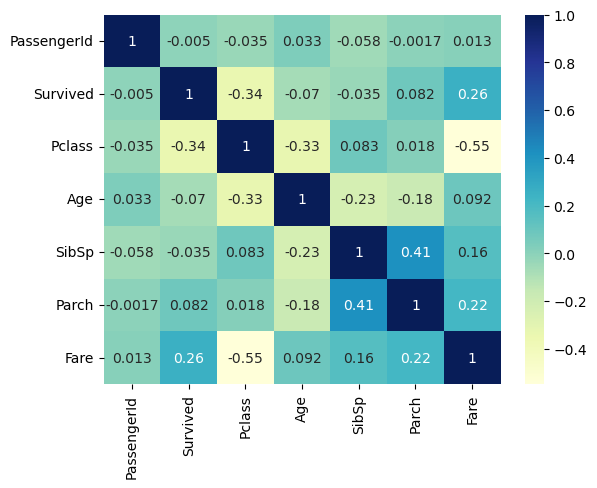

In [21]:
sns.heatmap(df_mean.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [22]:
dff=df_mean.drop('PassengerId', axis=1)

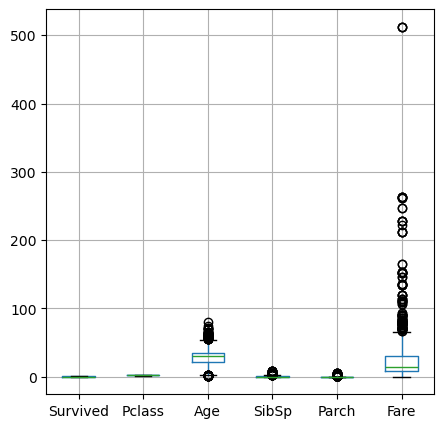

In [23]:
boxplot = dff.boxplot(figsize=(5,5))

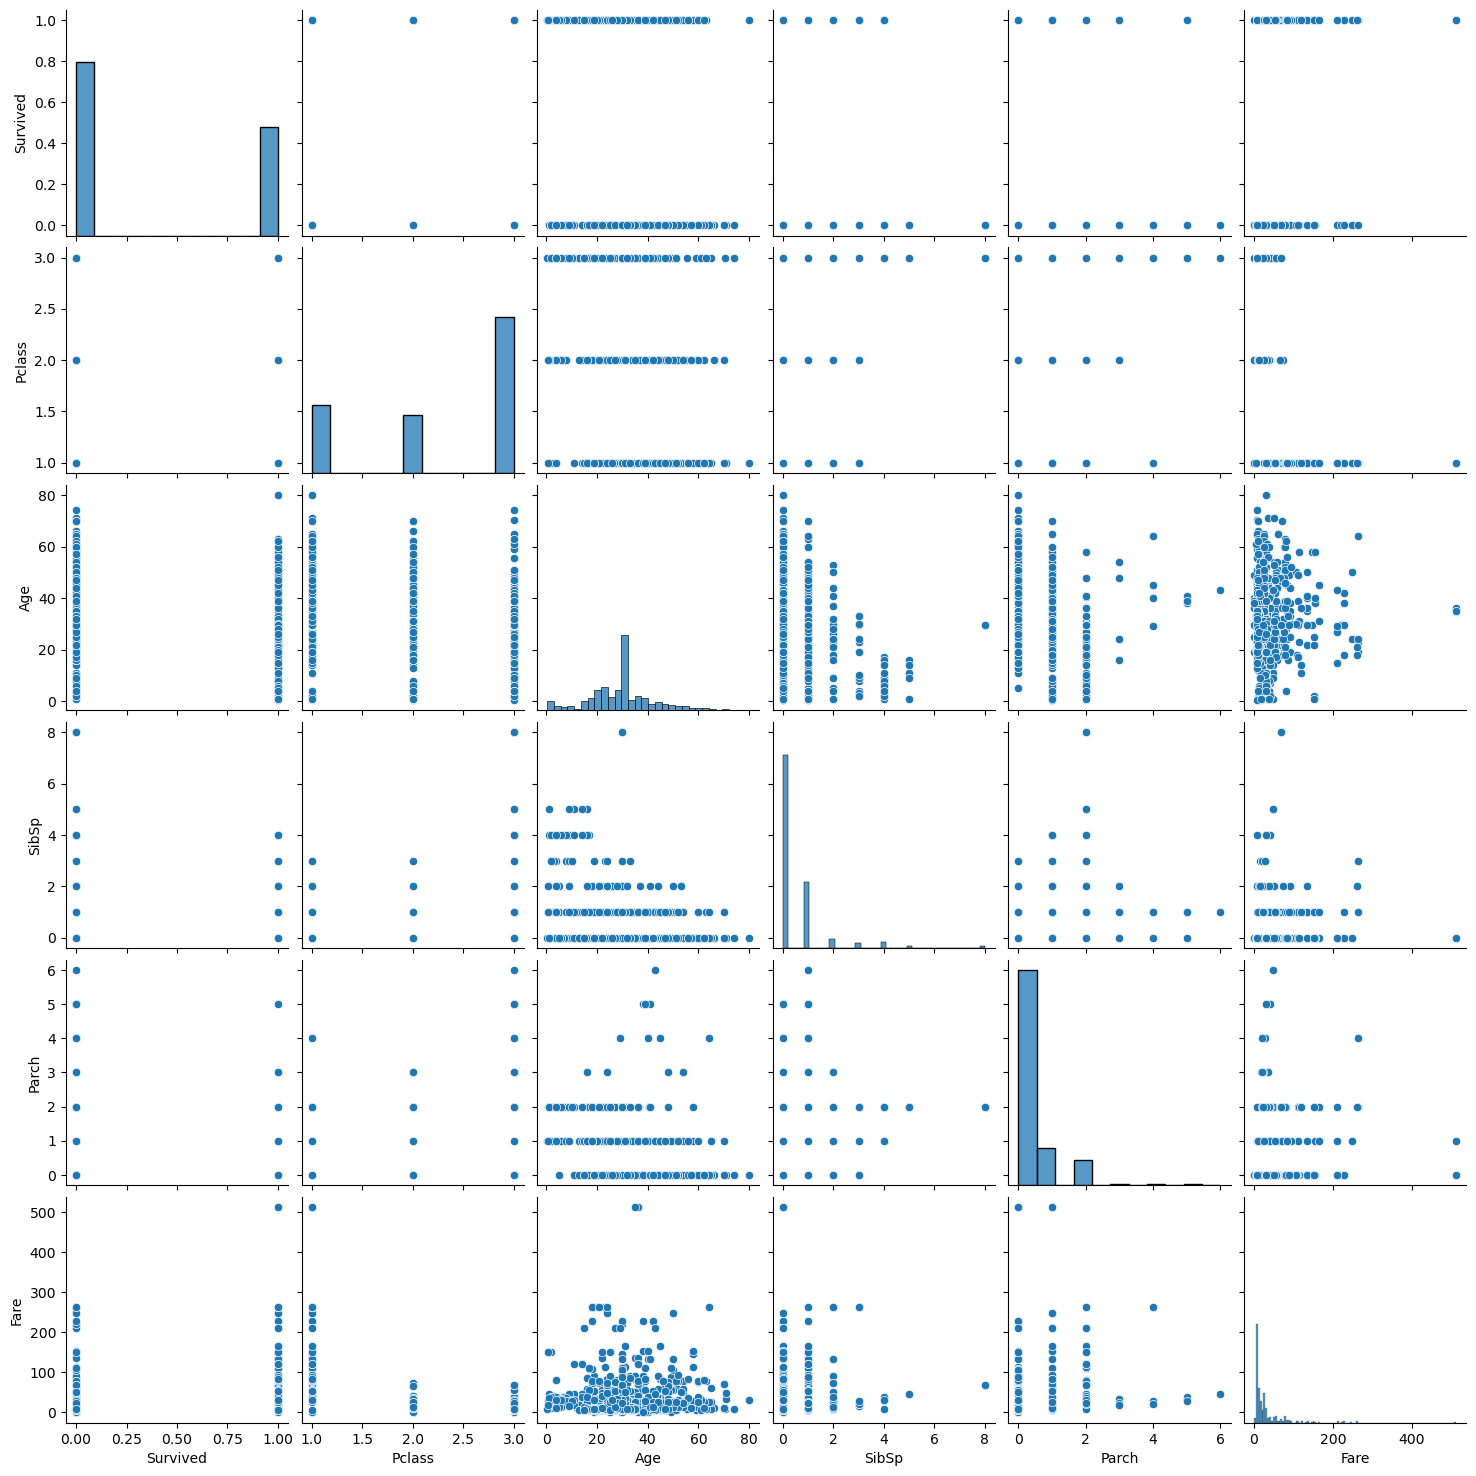

In [24]:
sns.pairplot(dff)

In [25]:
dff.drop(columns=['SibSp', 'Parch','Ticket', 'Name'], inplace=True)

In [26]:
dff.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [29]:
pd.get_dummies(dff['Embarked'], inplace=True)

TypeError: get_dummies() got an unexpected keyword argument 'inplace'

In [35]:
dataf=pd.get_dummies(dff,columns=['Sex','Embarked'])

In [36]:
dataf

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,0,1,0,0,1
1,1,1,38.000000,71.2833,1,0,1,0,0
2,1,3,26.000000,7.9250,1,0,0,0,1
3,1,1,35.000000,53.1000,1,0,0,0,1
4,0,3,35.000000,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,0,0,1
887,1,1,19.000000,30.0000,1,0,0,0,1
888,0,3,29.699118,23.4500,1,0,0,0,1
889,1,1,26.000000,30.0000,0,1,1,0,0


In [37]:
X=dataf.drop(['Survived'],1)
y=dataf['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

C:\Users\chris\AppData\Local\Temp\ipykernel_35892\4148571081.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=dataf.drop(['Survived'],1)


In [40]:
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    SVC()
    ]
cv=StratifiedKFold(n_splits=5)

for classifier in classifiers:
    pipe = Pipeline(steps=[('scaler', StandardScaler()),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    recall_scores = cross_val_score(pipe,X_train, y_train,cv=cv, scoring = 'recall')
    print(classifier, f"Recall score : {round(recall_scores.mean(),2)}")
    accuracy_scores = cross_val_score(pipe,X_train, y_train,cv=cv, scoring = 'accuracy')
    print(classifier, f"Accuracy score : {round(accuracy_scores.mean(),2)}")
    accuracy_scores = cross_val_score(pipe,X_train, y_train,cv=cv, scoring = 'balanced_accuracy')
    print(classifier, f"Balanced Accuracy score : {round(accuracy_scores.mean(),2)}")
    predictions = pipe.predict(X_test)
    print('class ratios: \n', pd.Series(predictions).value_counts()/predictions.shape[0], '\n')

LogisticRegression() Recall score : 0.71
LogisticRegression() Accuracy score : 0.79
LogisticRegression() Balanced Accuracy score : 0.78
class ratios: 
 0    0.600897
1    0.399103
dtype: float64 

GaussianNB() Recall score : 0.73
GaussianNB() Accuracy score : 0.78
GaussianNB() Balanced Accuracy score : 0.77
class ratios: 
 0    0.556054
1    0.443946
dtype: float64 

SVC() Recall score : 0.58
SVC() Accuracy score : 0.81
SVC() Balanced Accuracy score : 0.77
class ratios: 
 0    0.690583
1    0.309417
dtype: float64 

